# Project Phase 1 Dataset 1

Phase1 for class IEMS 351 at Northwestern.

Date: 2023/10/16

Zhe Wen

## Import required packages.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# 读取CSV文件
data = pd.read_csv('nPentaneIsopentane.csv')

In [7]:
# 查看前5行数据
print(data.head())

   Hydrogen  nPentane  Isopentane  ReactionRate
0     205.8      90.9        37.1         3.541
1     404.8      92.9        36.3         2.397
2     209.7     174.9        49.4         6.694
3     401.6     187.2        44.9         4.722
4     224.9      92.7       116.3         0.593


In [8]:
# 统计每列的缺失值数量
missing_values = data.isnull().sum()
print(missing_values)

Hydrogen        0
nPentane        0
Isopentane      0
ReactionRate    0
dtype: int64


In [40]:
# 查看数值列的基本统计信息
print(data.describe())

         Hydrogen    nPentane  Isopentane  ReactionRate
count   24.000000   24.000000   24.000000     24.000000
mean   290.504167  152.304167   74.875000      4.071458
std     95.218396   59.641716   40.547731      3.248049
min    106.600000   68.300000   10.500000      0.268000
25%    221.850000   99.875000   40.400000      2.016250
50%    300.100000  142.950000   83.850000      3.125000
75%    335.900000  186.975000   93.075000      5.234500
max    470.900000  294.400000  157.100000     11.648000


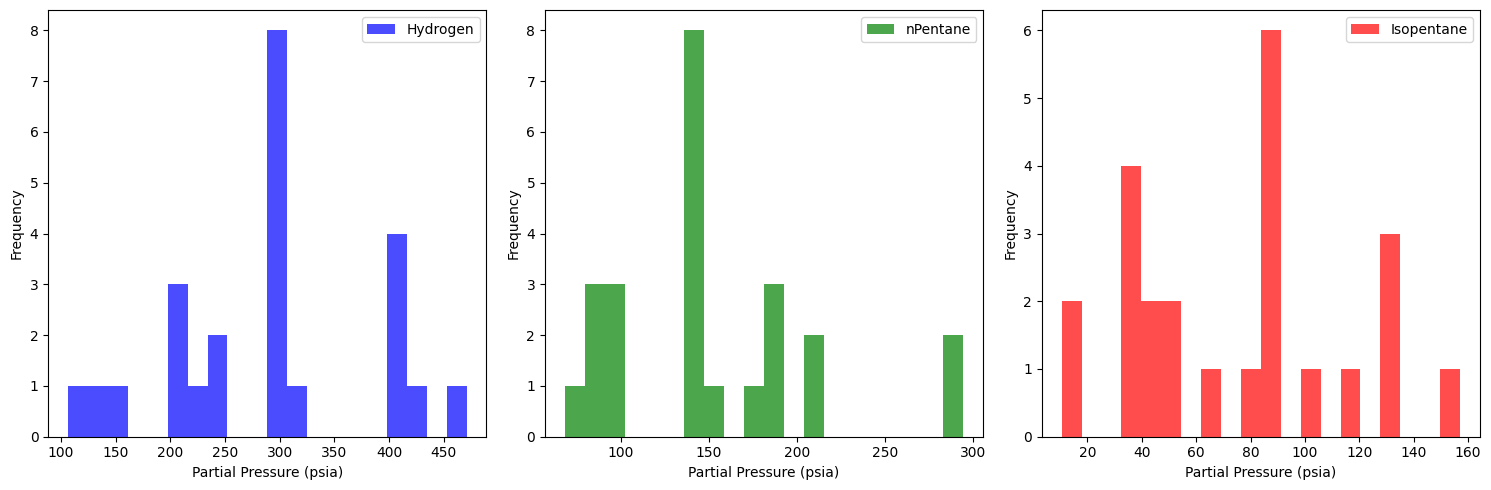

In [41]:
# 直方图

# 设置画布大小
plt.figure(figsize=(15, 5))

# 绘制直方图
plt.subplot(1, 3, 1)
plt.hist(data['Hydrogen'], bins=20, alpha=0.7, color='blue', label='Hydrogen')
plt.xlabel('Partial Pressure (psia)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(data['nPentane'], bins=20, alpha=0.7, color='green', label='nPentane')
plt.xlabel('Partial Pressure (psia)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(data['Isopentane'], bins=20, alpha=0.7, color='red', label='Isopentane')
plt.xlabel('Partial Pressure (psia)')
plt.ylabel('Frequency')
plt.legend()

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()


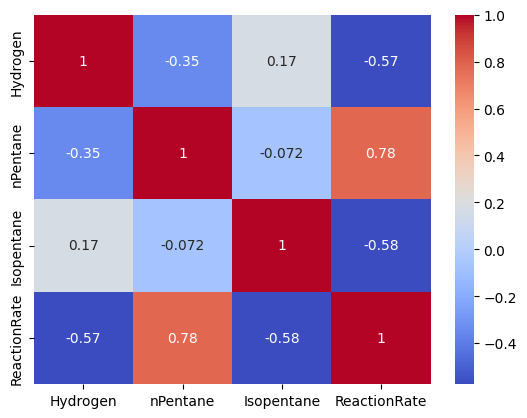

In [42]:
# 计算相关系数矩阵
correlation_matrix = data.corr()

# 可视化相关系数矩阵
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

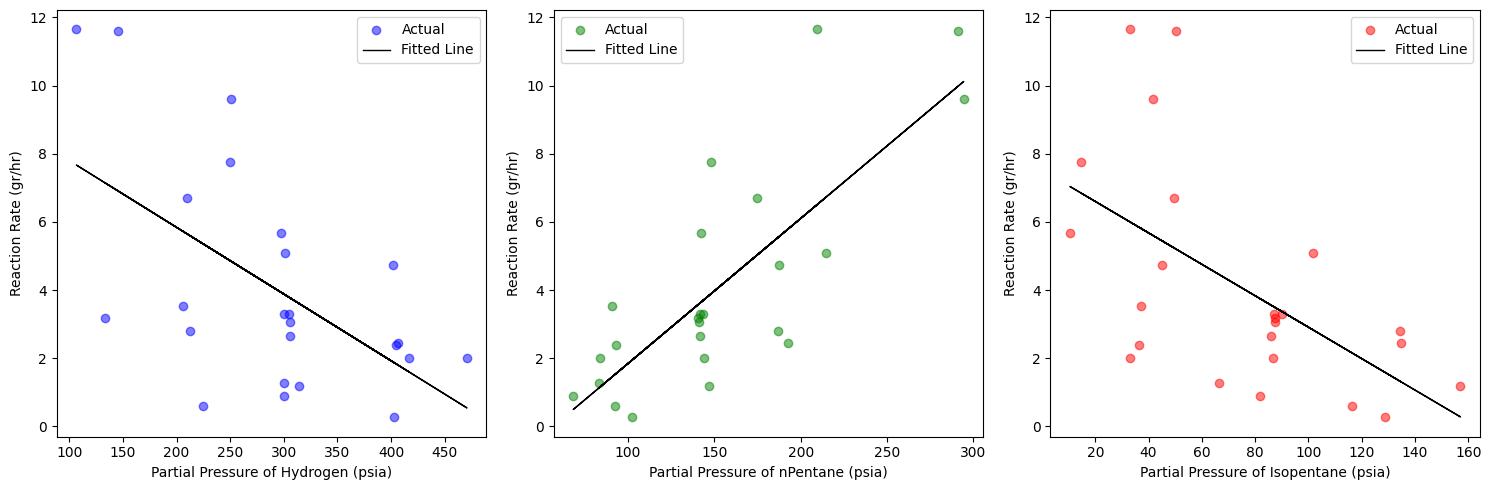

In [50]:
# 初始化线性回归模型
model_hydrogen = LinearRegression()
model_npentane = LinearRegression()
model_isopentane = LinearRegression()

# 提取特征和目标变量
X_hydrogen = data[['Hydrogen']]
X_npentane = data[['nPentane']]
X_isopentane = data[['Isopentane']]

# 训练模型
model_hydrogen.fit(X_hydrogen, y_reaction_rate)
model_npentane.fit(X_npentane, y_reaction_rate)
model_isopentane.fit(X_isopentane, y_reaction_rate)

# 预测
y_pred_hydrogen = model_hydrogen.predict(X_hydrogen)
y_pred_npentane = model_npentane.predict(X_npentane)
y_pred_isopentane = model_isopentane.predict(X_isopentane)

# 设置画布大小
plt.figure(figsize=(15, 5))

# 绘制Hydrogen与ReactionRate的散点图和拟合直线
plt.subplot(1, 3, 1)
plt.scatter(data['Hydrogen'], data['ReactionRate'], alpha=0.5, color='blue', label='Actual')
plt.plot(data['Hydrogen'], y_pred_hydrogen, '-k', linewidth=1, label='Fitted Line')
plt.xlabel('Partial Pressure of Hydrogen (psia)')
plt.ylabel('Reaction Rate (gr/hr)')
plt.legend()

# 绘制nPentane与ReactionRate的散点图和拟合直线
plt.subplot(1, 3, 2)
plt.scatter(data['nPentane'], data['ReactionRate'], alpha=0.5, color='green', label='Actual')
plt.plot(data['nPentane'], y_pred_npentane, '-k', linewidth=1, label='Fitted Line')
plt.xlabel('Partial Pressure of nPentane (psia)')
plt.ylabel('Reaction Rate (gr/hr)')
plt.legend()

# 绘制Isopentane与ReactionRate的散点图和拟合直线
plt.subplot(1, 3, 3)
plt.scatter(data['Isopentane'], data['ReactionRate'], alpha=0.5, color='red', label='Actual')
plt.plot(data['Isopentane'], y_pred_isopentane, '-k', linewidth=1, label='Fitted Line')
plt.xlabel('Partial Pressure of Isopentane (psia)')
plt.ylabel('Reaction Rate (gr/hr)')
plt.legend()

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()


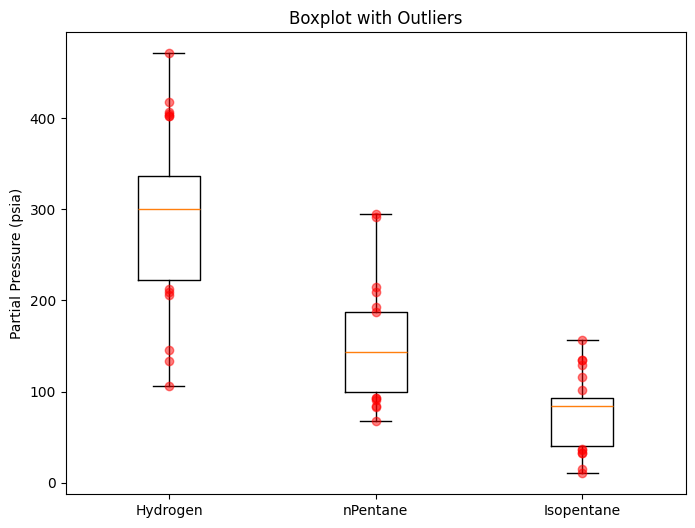

In [18]:
# 箱线图

# 设置画布大小
plt.figure(figsize=(8, 6))

# 绘制箱线图并标记离群值
plt.boxplot(data[['Hydrogen', 'nPentane', 'Isopentane']].values, labels=['Hydrogen', 'nPentane', 'Isopentane'], showfliers=True)

# 获取离群值
outliers = {
    'Hydrogen': data[(data['Hydrogen'] < data['Hydrogen'].quantile(0.25)) | (data['Hydrogen'] > data['Hydrogen'].quantile(0.75))]['Hydrogen'],
    'nPentane': data[(data['nPentane'] < data['nPentane'].quantile(0.25)) | (data['nPentane'] > data['nPentane'].quantile(0.75))]['nPentane'],
    'Isopentane': data[(data['Isopentane'] < data['Isopentane'].quantile(0.25)) | (data['Isopentane'] > data['Isopentane'].quantile(0.75))]['Isopentane']
}

# 标记离群值
for key, value in outliers.items():
    plt.plot([list(data.columns).index(key) + 1] * len(value), value, 'ro', alpha=0.5)

plt.ylabel('Partial Pressure (psia)')
plt.title('Boxplot with Outliers')
plt.show()


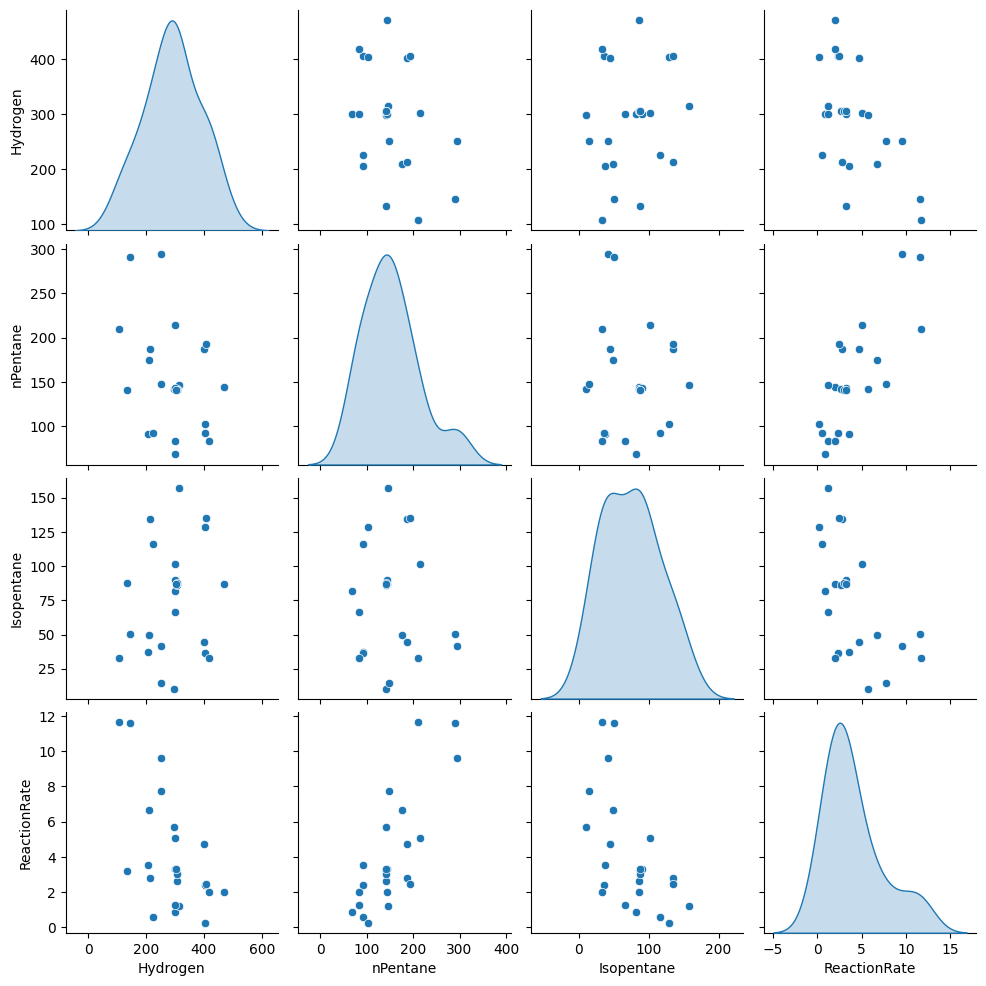

In [14]:
# 成对关系可视化
sns.pairplot(data, diag_kind='kde')
plt.show()

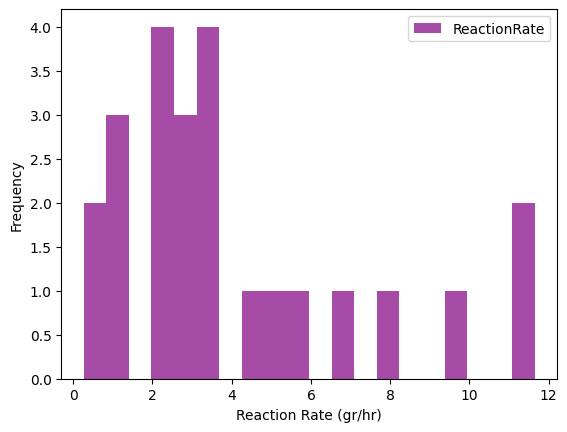

In [21]:
# 反应速率的分布
plt.hist(data['ReactionRate'], bins=20, alpha=0.7, color='purple', label='ReactionRate')
plt.xlabel('Reaction Rate (gr/hr)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

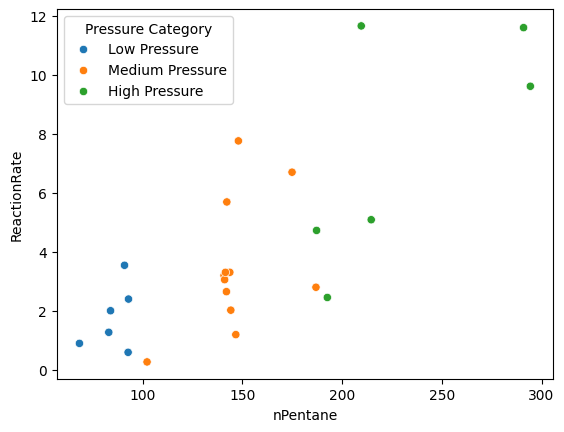

In [12]:
# 反应速率与不同压力下的关系：

# 将压力离散化为"低压"、"中压"和"高压"

# 计算 n-pentane 的第一四分位数和第三四分位数
q1 = data['nPentane'].quantile(0.25)
q3 = data['nPentane'].quantile(0.75)

# 根据压力水平分类
def categorize_pressure(pressure):
    if pressure < q1:
        return 'Low Pressure'
    elif pressure > q3:
        return 'High Pressure'
    else:
        return 'Medium Pressure'

# 添加一个新的列 'Pressure Category'，用于存储分类信息
data['Pressure Category'] = data['nPentane'].apply(categorize_pressure)

# 绘制散点图
sns.scatterplot(x='nPentane', y='ReactionRate', hue='Pressure Category', data = data)

# 显示图例
plt.legend(title='Pressure Category')

# 显示图形
plt.show()



In [25]:
#### 回归

# 提取特征和目标变量
X = data[['Hydrogen', 'nPentane', 'Isopentane']]
y = data['ReactionRate']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)

# 输出模型参数
print(f'模型系数：{model.coef_}')
print(f'模型截距：{model.intercept_}')
print(f'均方误差：{mse}')

模型系数：[-0.01163924  0.03223344 -0.03853479]
模型截距：5.6103478725242795
均方误差：1.2886518014993176


In [27]:
# 添加常数项（截距）
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# 初始化线性回归模型
model = sm.OLS(y_train, X_train)

# 拟合模型
results = model.fit()

# 输出参数的估计值
print(f'参数的估计值 (estimates): {results.params}')

# 输出参数的标准误差
print(f'参数的标准误差 (standard error): {results.bse}')

# 输出近似相关矩阵
print(f'近似相关矩阵 (approximate correlation matrix):\n{results.cov_HC0}')


参数的估计值 (estimates): const         5.610348
Hydrogen     -0.011639
nPentane      0.032233
Isopentane   -0.038535
dtype: float64
参数的标准误差 (standard error): const         1.152183
Hydrogen      0.002307
nPentane      0.003666
Isopentane    0.004542
dtype: float64
近似相关矩阵 (approximate correlation matrix):
[[ 1.47917509e+00 -2.95079530e-03 -2.54716592e-03 -1.42787626e-03]
 [-2.95079530e-03  6.87215472e-06  3.86896915e-06  9.11627519e-07]
 [-2.54716592e-03  3.86896915e-06  9.20373933e-06 -6.20242348e-07]
 [-1.42787626e-03  9.11627519e-07 -6.20242348e-07  1.75458569e-05]]


In [35]:
# 二阶多项式特征/多项式回归

# 创建二阶特征
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 初始化线性回归模型
model_poly = LinearRegression()

# 训练模型
model_poly.fit(X_train_poly, y_train)

# 预测
y_pred_poly = model_poly.predict(X_test_poly)

# 计算均方误差
mse_poly = mean_squared_error(y_test, y_pred_poly)

# 输出模型参数
print(f'模型系数：{model_poly.coef_}')
print(f'模型截距：{model_poly.intercept_}')
print(f'均方误差：{mse_poly}')

模型系数：[ 0.00000000e+00  1.77286232e-14 -1.25296530e-02  2.83340896e-02
 -4.50532978e-02  2.38849739e-16 -1.25296530e-02  2.83340896e-02
 -4.50532978e-02  1.67205095e-05 -4.40168505e-05  1.48436871e-04
 -4.28974652e-05 -2.29608423e-05  6.42375009e-05]
模型截距：7.502249542960745
均方误差：1.0486553769977813
